<h1 align="center"> Homework 11: Data Completion </h1>
<h3 align="center"> Last Update: 12/02/2021 </h3>
<h3 align="center"> Students: Vineela Bandi, Mark Chafin </h3>

##Task 1: Deal with imbalanced dataset
###1.1 Read the dataset into a pandas DataFrame. Show the datatype of variables in the dataset

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
train_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/train_data.csv")
test_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/test_data.csv")

In [4]:
train_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
3140,0.4,0.26,0.93,0.0,0.00,0.80,0.0,0.80,0.8,1.20,0.0,0.80,0.40,0.0,1.46,0.00,0.26,2.26,2.40,0.53,1.06,0.0,0.8,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.593,0.217,0.039,11.463,525,1112,1
179,0.0,0.00,0.00,0.0,0.74,0.00,0.0,0.00,0.0,1.49,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.49,0.00,0.74,0.0,0.0,0.00,2.98,2.23,1.49,2.23,0.74,0.74,1.49,0.74,0.00,0.74,0.74,1.49,0.74,0.0,0.0,0.74,0.0,0.0,0.74,0.0,0.74,0.0,0.0,0.00,0.000,0.557,0.111,0.000,0.000,0.000,2.607,12,133,0
2970,0.0,0.00,0.00,0.0,0.00,0.13,0.0,0.27,0.0,0.00,0.0,0.54,0.13,0.0,0.00,0.00,0.68,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.90,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.54,0.27,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.161,0.143,0.000,0.000,0.000,0.000,2.296,21,473,0
537,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.27,0.0,1.27,0.00,0.0,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.27,0.000,0.111,0.000,0.111,0.000,0.000,1.730,7,45,0
1801,0.0,0.00,0.55,0.0,0.55,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.55,0.00,0.00,3.31,0.00,1.10,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.55,0.0,0.0,0.00,0.000,0.104,0.000,0.524,0.000,0.000,1.229,7,75,1


In [5]:
test_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
575,0.0,0.00,0.86,0.0,0.43,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.43,0.00,0.00,2.17,0.0,1.30,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.00,0.0,0.0,0.0,0.161,0.0,1.133,0.000,0.000,1.200,6,114,1
1081,0.0,0.22,0.45,0.0,0.68,0.00,0.22,0.22,0.9,0.68,0.45,0.90,0.00,0.0,0.0,0.68,0.00,0.90,3.86,0.0,1.13,0.0,0.0,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.00,0.0,0.0,0.0,0.033,0.0,1.103,0.133,0.033,7.166,54,430,1
514,0.0,0.00,0.59,0.0,0.19,0.00,0.00,0.00,0.0,0.00,0.00,0.39,0.19,0.0,0.0,0.19,0.19,0.19,2.19,0.0,0.59,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.19,0.0,0.0,0.0,0.232,0.0,0.000,0.038,0.000,1.129,4,96,0
436,0.0,0.00,0.38,0.0,1.15,0.76,0.00,0.00,0.0,0.00,0.00,0.38,0.38,0.0,0.0,0.38,0.00,0.38,2.69,0.0,2.30,0.0,0.0,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.122,0.0,0.061,0.061,0.000,1.775,20,158,1
411,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0


In [6]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [7]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              1381 non-null   float64
 1   word_freq_address           1381 non-null   float64
 2   word_freq_all               1381 non-null   float64
 3   word_freq_3d                1381 non-null   float64
 4   word_freq_our               1381 non-null   float64
 5   word_freq_over              1381 non-null   float64
 6   word_freq_remove            1381 non-null   float64
 7   word_freq_internet          1381 non-null   float64
 8   word_freq_order             1381 non-null   float64
 9   word_freq_mail              1381 non-null   float64
 10  word_freq_receive           1381 non-null   float64
 11  word_freq_will              1381 non-null   float64
 12  word_freq_people            1381 non-null   float64
 13  word_freq_report            1381 

In [8]:
#summary statistics of train dataset
train_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.099854,0.219792,0.284391,0.041627,0.306783,0.100839,0.112981,0.108127,0.087357,0.239550,0.060208,0.538217,0.094820,0.050960,0.048711,0.248795,0.143783,0.185702,1.660596,0.090025,0.805665,0.112348,0.097130,0.089326,0.545087,0.258071,0.817966,0.123457,0.099345,0.102658,0.060851,0.048152,0.102043,0.048932,0.104115,0.098155,0.133627,0.013736,0.076997,0.065071,0.039947,0.120705,0.045245,0.084677,0.303429,0.181649,0.005587,0.035149,0.039989,0.140453,0.016707,0.268132,0.072931,0.048461,5.213943,53.550311,285.312112,0.394099
std,0.285808,1.329902,0.504691,1.010729,0.654040,0.289473,0.402128,0.414894,0.255191,0.661345,0.200799,0.836783,0.297718,0.267195,0.260803,0.816513,0.445634,0.536368,1.775453,0.547965,1.182441,0.985118,0.339321,0.389735,1.705536,0.877701,3.490149,0.532749,0.596904,0.450942,0.349212,0.331636,0.587260,0.332598,0.548108,0.404493,0.417649,0.214616,0.420535,0.349375,0.344993,0.714601,0.218817,0.690045,1.049520,0.951394,0.078357,0.313863,0.251293,0.293065,0.111976,0.811123,0.223694,0.501323,33.335451,219.385696,621.036731,0.488732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.571000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [9]:
#summary statistics of test dataset
test_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,0.11551,0.197212,0.271948,0.120912,0.324909,0.084388,0.117067,0.098689,0.096387,0.239095,0.058928,0.549826,0.091854,0.076503,0.050355,0.248972,0.139797,0.182513,1.665605,0.075206,0.819312,0.141846,0.112172,0.105793,0.559804,0.282433,0.649182,0.128081,0.097915,0.103302,0.073852,0.044475,0.086003,0.045279,0.108436,0.095894,0.144707,0.011955,0.082433,0.06428,0.052339,0.159464,0.048088,0.066416,0.296083,0.175568,0.005112,0.024222,0.035277,0.135714,0.017604,0.271260,0.082526,0.034391,5.139220,48.960898,278.572773,0.393917
std,0.34655,1.194171,0.502937,2.025049,0.713815,0.232985,0.365437,0.366883,0.326793,0.604540,0.203344,0.917431,0.308733,0.455527,0.254306,0.847332,0.440501,0.518871,1.776184,0.407004,1.242970,1.114872,0.374526,0.546434,1.589337,0.908261,3.059694,0.552105,0.585114,0.469959,0.507780,0.321372,0.474840,0.322080,0.493511,0.398370,0.436736,0.234194,0.466110,0.35130,0.396436,0.876259,0.235116,0.422585,0.917777,0.809776,0.071208,0.205618,0.224230,0.208048,0.103159,0.826472,0.291102,0.167531,27.635828,119.688508,570.822166,0.488794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,6.000000,33.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [10]:
#splitting the output variable from the train and test data
train_X=train_dat.drop('class', axis=1)
train_y=train_dat['class']
test_X=test_dat.drop('class', axis=1)
test_y=test_dat['class']

In [11]:
train_X.shape

(3220, 57)

In [12]:
train_y.shape

(3220,)

In [13]:
test_X.shape

(1381, 57)

In [14]:
test_y.shape

(1381,)

###1.2 Normalize the data


In [15]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [16]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.023008,0.065854,0.0,0.000000,0.000000,0.000000,1.0
word_freq_address,3220.0,0.015392,0.093130,0.0,0.000000,0.000000,0.000000,1.0
word_freq_all,3220.0,0.062641,0.111165,0.0,0.000000,0.000000,0.094714,1.0
word_freq_3d,3220.0,0.001037,0.025186,0.0,0.000000,0.000000,0.000000,1.0
word_freq_our,3220.0,0.030678,0.065404,0.0,0.000000,0.000000,0.037000,1.0
word_freq_over,3220.0,0.017149,0.049230,0.0,0.000000,0.000000,0.000000,1.0
word_freq_remove,3220.0,0.015541,0.055313,0.0,0.000000,0.000000,0.000000,1.0
word_freq_internet,3220.0,0.009732,0.037344,0.0,0.000000,0.000000,0.000000,1.0
word_freq_order,3220.0,0.033729,0.098529,0.0,0.000000,0.000000,0.000000,1.0
word_freq_mail,3220.0,0.013177,0.036378,0.0,0.000000,0.000000,0.008251,1.0


In [17]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,1381.0,0.026615,0.079850,0.0,0.000000,0.000000,0.000000,1.046083
word_freq_address,1381.0,0.013810,0.083625,0.0,0.000000,0.000000,0.000000,1.000000
word_freq_all,1381.0,0.059900,0.110779,0.0,0.000000,0.000000,0.090308,1.123348
word_freq_3d,1381.0,0.003013,0.050462,0.0,0.000000,0.000000,0.000000,1.066783
word_freq_our,1381.0,0.032491,0.071382,0.0,0.000000,0.000000,0.043000,0.909000
word_freq_over,1381.0,0.014352,0.039623,0.0,0.000000,0.000000,0.000000,0.413265
word_freq_remove,1381.0,0.016103,0.050266,0.0,0.000000,0.000000,0.000000,0.561210
word_freq_internet,1381.0,0.008883,0.033023,0.0,0.000000,0.000000,0.000000,0.545455
word_freq_order,1381.0,0.037215,0.126175,0.0,0.000000,0.000000,0.000000,2.030888
word_freq_mail,1381.0,0.013152,0.033253,0.0,0.000000,0.000000,0.010451,0.611111


##2. K-Nearest Neighbour model
###2.1 Train a K-NN classifier

In [18]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [19]:
knn5.fit(train_X_scale, train_y)


KNeighborsClassifier()

In [20]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [21]:
from sklearn import metrics

# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[779  58]
 [ 83 461]]


In [22]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

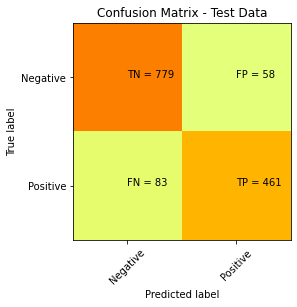

In [23]:
print_cm(cm)

In [24]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_knn5)

0.8979000724112962

In [25]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_knn5)

0.8890656845175345

In [26]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_knn5)

0.7844411406228724

In [27]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       837
           1       0.89      0.85      0.87       544

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



### 2.2. Tune the k-NN Classifier

The choice of the paramter value k has impact on the performance of the k-NN algorithm.

In [28]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("Accuracy is ", metrics.accuracy_score(test_y, pred_y)*100,"% for k =",k)

Accuracy is  90.87617668356263 % for k = 1
Accuracy is  88.7038377986966 % for k = 2
Accuracy is  90.22447501810282 % for k = 3
Accuracy is  89.2831281679942 % for k = 4
Accuracy is  89.79000724112962 % for k = 5
Accuracy is  88.5590152063722 % for k = 6
Accuracy is  88.7038377986966 % for k = 7
Accuracy is  87.97972483707458 % for k = 8
Accuracy is  88.12454742939899 % for k = 9
Accuracy is  87.40043446777698 % for k = 10
Accuracy is  87.83490224475018 % for k = 11
Accuracy is  86.96596669080377 % for k = 12
Accuracy is  87.32802317161477 % for k = 13
Accuracy is  87.11078928312817 % for k = 14
Accuracy is  86.74873280231716 % for k = 15
Accuracy is  86.16944243301955 % for k = 16
Accuracy is  86.60391020999276 % for k = 17
Accuracy is  86.74873280231716 % for k = 18
Accuracy is  86.74873280231716 % for k = 19
Accuracy is  86.96596669080377 % for k = 20


If we use overall accuracy as the measure, the optimal hyperparameter is k = 1. 

We can use different performance metric to tune the parameter. Now let's tune the k parameter based on AUC.

In [29]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y)*100,2),"% for k =",k)

AUC is  90.35 % for k = 1
AUC is  86.63 % for k = 2
AUC is  89.62 % for k = 3
AUC is  87.68 % for k = 4
AUC is  88.91 % for k = 5
AUC is  86.89 % for k = 6
AUC is  87.53 % for k = 7
AUC is  86.19 % for k = 8
AUC is  86.86 % for k = 9
AUC is  85.65 % for k = 10
AUC is  86.52 % for k = 11
AUC is  85.13 % for k = 12
AUC is  85.85 % for k = 13
AUC is  85.22 % for k = 14
AUC is  85.11 % for k = 15
AUC is  84.15 % for k = 16
AUC is  84.83 % for k = 17
AUC is  84.66 % for k = 18
AUC is  84.98 % for k = 19
AUC is  84.9 % for k = 20


From the above parameter tuning, the best k-NN classifier for this dataset is k = 1 if AUC is used as the performance measure. Let's set k = 1 and fit the final model. 

In [30]:
knn_final = neighbors.KNeighborsClassifier(n_neighbors = 1, 
                                      weights='uniform',                                    
                                      algorithm='auto')
knn_final.fit(train_X_scale, train_y)
pred_y_knn_final = knn_final.predict(test_X_scale)

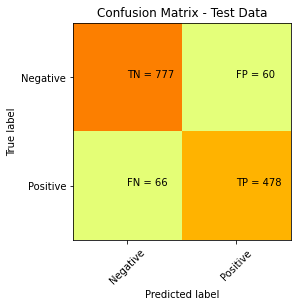

In [31]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_knn_final))

In [32]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_knn_final)

0.9087617668356264

In [33]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_knn_final)

0.9034959413873076

In [34]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_knn_final)

0.8085527748988335

In [35]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn_final))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       837
           1       0.89      0.88      0.88       544

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381



### 2.3. Compare the Two k-NN Models

In [36]:
acc = [metrics.accuracy_score(test_y, pred_y_knn5),
       metrics.accuracy_score(test_y, pred_y_knn_final)]

pre = [metrics.precision_score(test_y, pred_y_knn5),
       metrics.precision_score(test_y, pred_y_knn_final)]

rec = [metrics.recall_score(test_y, pred_y_knn5),
       metrics.recall_score(test_y, pred_y_knn_final)]

f1  = [metrics.f1_score(test_y, pred_y_knn5),
       metrics.f1_score(test_y, pred_y_knn_final)]

In [37]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN (k=5)','k-NN (k=1)'])

,Accuracy,Precision,Recall,F1 Score
k-NN (k=5),0.897900,0.888247,0.847426,0.867357
k-NN (k=1),0.908762,0.888476,0.878676,0.883549


Compared with the kNN with k=5, the kNN model with k=1 has higher values of Accuracy, Precision, Recall and F1 Score.

##3. Naive Bayes
###3.1 Gaussian Naive Bayes Classifier

In [38]:
# Gaussian Naive Bayes (GaussianNB) for classification. The likelihood of features is assumed to be Gaussian.
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [39]:
gauss_nb.fit(train_X, train_y)

GaussianNB()

Now, let's use the test dataset to assess the performance of the trained model.

In [40]:
pred_y_gnb = gauss_nb.predict(test_X)

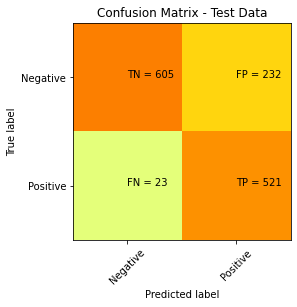

In [41]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_gnb))

In [42]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_gnb)

0.8153511947863866

In [43]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_gnb)

0.840270091011315

In [44]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_gnb)

0.6376607301421041

In [45]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       837
           1       0.69      0.96      0.80       544

    accuracy                           0.82      1381
   macro avg       0.83      0.84      0.81      1381
weighted avg       0.86      0.82      0.82      1381



### 3.2. Bernoulli Naive Bayes Classifier

In [46]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

In [47]:
bernou_nb.fit(train_X, train_y)

BernoulliNB()

In [48]:
pred_y_bnb = bernou_nb.predict(test_X)

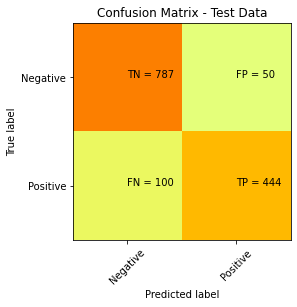

In [49]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_bnb))

In [50]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_bnb)

0.8913830557566981

In [51]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_bnb)

0.8782196570384426

In [52]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_bnb)

0.768807351736484

In [53]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       837
           1       0.90      0.82      0.86       544

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381



### 3.3. Compare the Two Naive Bayes Models

In [54]:
acc = [metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb)]

pre = [metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb)]

rec = [metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb)]

f1  = [metrics.f1_score(test_y, pred_y_gnb),
       metrics.f1_score(test_y, pred_y_bnb)]

In [55]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Gaussian Naive Bayes','Bernoulli Naive Bayes'])

,Accuracy,Precision,Recall,F1 Score
Gaussian Naive Bayes,0.815351,0.691899,0.957721,0.803392
Bernoulli Naive Bayes,0.891383,0.898785,0.816176,0.855491


Compared with the Gaussian naive Bayes model, the Bernoulli naive Bayes model has a higher accuracy, Precision and F1 score. The Gaussian naive Bayes model has a higher Recall.

## 4. Decision Tree Classifier
Now, let's build a classification tree algorithm (decision tree classifier)

In [56]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy')

In [57]:
# Import modules
import pydotplus
from IPython.display import Image

# Export the decision tree as a graphviz dot object
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=train_X.columns,
                                class_names= ['Good', 'Bad'],
                                filled=True, rounded=True,
                                special_characters=False)

# Convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [58]:
# Show the graph
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

We get a very large decision tree. The variables on the decision tree are important to predict the outcome. The large decsion tree means many variables are important to predict the outcome.

Now, let's use the test dataset to assess the performance of the trained model.

In [59]:
pred_y_dt = dt.predict(test_X)

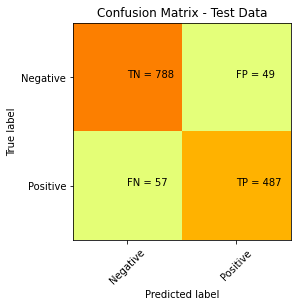

In [60]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))

In [61]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_dt)

0.9232440260680667

In [62]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_dt)

0.9183390874270856

In [63]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_dt)

0.8388373158121879

In [64]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       837
           1       0.91      0.90      0.90       544

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



## 5. Random Forests

In [65]:
from sklearn.ensemble import RandomForestClassifier

### 5.1. RF Classifier

In [66]:
# Train an RF classifier
rf = RandomForestClassifier(n_estimators=100, max_features=10, random_state=123)

In [67]:
rf.fit(train_X,train_y)

RandomForestClassifier(max_features=10, random_state=123)

In [68]:
# Show feature importance
rf.feature_importances_

array([0.00259823, 0.00467675, 0.00715937, 0.00047883, 0.02401698,
       0.00820638, 0.08196732, 0.01071002, 0.00317804, 0.00722312,
       0.00671507, 0.01055819, 0.00303531, 0.00165455, 0.00079303,
       0.0752856 , 0.01460663, 0.00661651, 0.02423146, 0.00344806,
       0.04963242, 0.00274345, 0.02124812, 0.04418118, 0.04737078,
       0.0163386 , 0.02129353, 0.00594874, 0.00142645, 0.00304383,
       0.00143305, 0.00064267, 0.0029922 , 0.00078884, 0.00280964,
       0.00326576, 0.01174621, 0.00052243, 0.00272577, 0.00077661,
       0.00078109, 0.00542507, 0.00191798, 0.00148978, 0.00901049,
       0.01752603, 0.00019712, 0.00149529, 0.0041287 , 0.01262175,
       0.00203375, 0.12061511, 0.11854211, 0.00206704, 0.06477324,
       0.06160147, 0.03768425])

In [69]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
char_freq_!,0.120615
char_freq_$,0.118542
word_freq_remove,0.081967
word_freq_free,0.075286
capital_run_length_average,0.064773
capital_run_length_longest,0.061601
word_freq_your,0.049632
word_freq_hp,0.047371
word_freq_money,0.044181
capital_run_length_total,0.037684


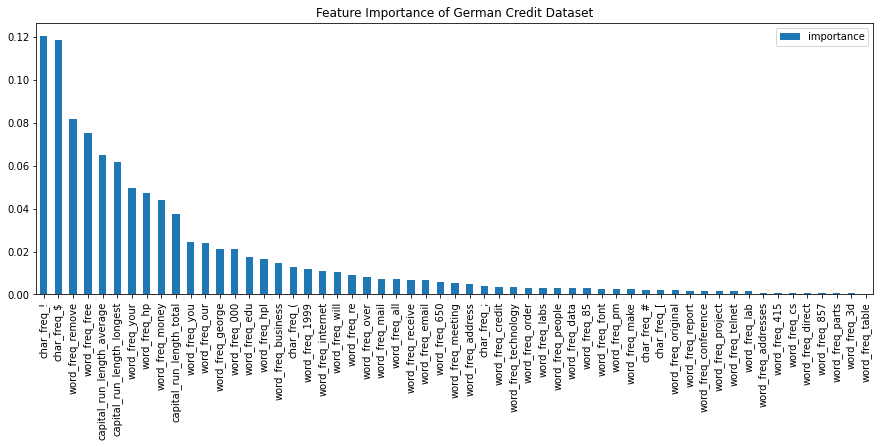

In [70]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [71]:
# Predict on test set
pred_y_rf = rf.predict(test_X)

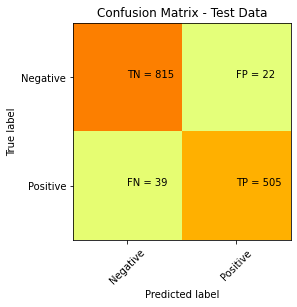

In [72]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf))

In [73]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf)

0.9558291093410572

In [74]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_rf)

0.9510122373322089

In [75]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_rf)

0.9069853976316007

In [76]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.93      0.94       544

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381



### 5.2. Tune Hyper-parameters
We need to tune the parameters in order to get a model with better performance.

TUNING 1

In [77]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[70,100,200],
              'max_features':[15,20,40],
              'random_state':[123]}
parameters

{'criterion': ['gini', 'entropy'],
 'max_features': [15, 20, 40],
 'n_estimators': [70, 100, 200],
 'random_state': [123]}

In [78]:
rf2 = RandomForestClassifier()

In [79]:
from sklearn.model_selection import GridSearchCV

# Use a 3-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=3, verbose=2, n_jobs=6)

Since the dataset is imbalanced, AUC is used as performance metric to choose the best algorithm. The cross-validation parameter tuning is usually time consuming. We record the execution time. 

In [80]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:12/03/2021 06:08:24
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time End:12/03/2021 06:09:30
Execution Time (Seconds):65.95841240882874


In [81]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 15,
 'n_estimators': 200,
 'random_state': 123}

In [82]:
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X)

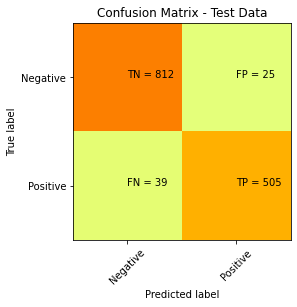

In [83]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf_final))

In [84]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf_final)

0.9536567704561911

TUNING 2

In [85]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[200,250,400,500],
              'max_features':[9,13,15,17],
              'random_state':[123]}
parameters

{'criterion': ['gini', 'entropy'],
 'max_features': [9, 13, 15, 17],
 'n_estimators': [200, 250, 400, 500],
 'random_state': [123]}

In [86]:
# Use a 3-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=3, verbose=2, n_jobs=6)

In [87]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:12/03/2021 06:09:30
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Time End:12/03/2021 06:12:35
Execution Time (Seconds):184.80567240715027


In [88]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 9,
 'n_estimators': 500,
 'random_state': 123}

In [89]:
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X)

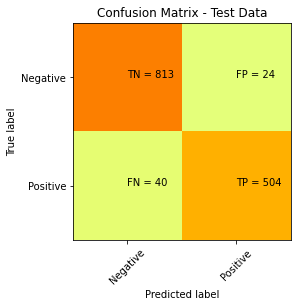

In [90]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf_final))

In [91]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf_final)

0.9536567704561911

TUNING 3

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[50,100,250,500],
              'max_features':[5,7,9,15],
              'random_state':[123]}
parameters

{'criterion': ['gini', 'entropy'],
 'max_features': [5, 7, 9, 15],
 'n_estimators': [50, 100, 250, 500],
 'random_state': [123]}

In [93]:
# Use a 3-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=3, verbose=2, n_jobs=6)

In [94]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:12/03/2021 06:12:35
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Time End:12/03/2021 06:14:13
Execution Time (Seconds):97.73179793357849


In [95]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 5,
 'n_estimators': 250,
 'random_state': 123}

In [96]:
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X)

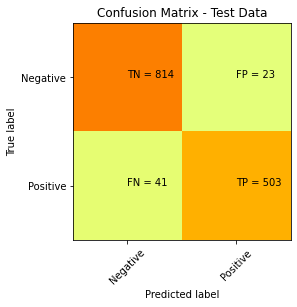

In [97]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf_final))

In [98]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf_final)

0.9536567704561911

TUNING 4

In [99]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[200,250,500],
              'max_features':[5,9,15],
              'random_state':[123]}
parameters

{'criterion': ['gini', 'entropy'],
 'max_features': [5, 9, 15],
 'n_estimators': [200, 250, 500],
 'random_state': [123]}

In [100]:
# Use a 3-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=3, verbose=2, n_jobs=6)

In [101]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:12/03/2021 06:14:13
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Time End:12/03/2021 06:15:33
Execution Time (Seconds):79.8076159954071


In [102]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 5,
 'n_estimators': 250,
 'random_state': 123}

In [103]:
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X)

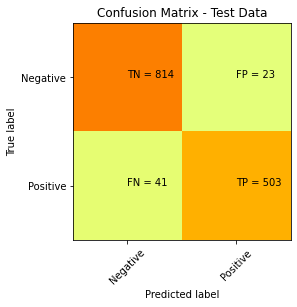

In [104]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf_final))

In [105]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf_final)

0.9536567704561911

### 5.3. Model Comparison

In [106]:
acc = [metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_rf_final)]

pre = [metrics.precision_score(test_y, pred_y_rf),
       metrics.precision_score(test_y, pred_y_rf_final)]

rec = [metrics.recall_score(test_y, pred_y_rf),
       metrics.recall_score(test_y, pred_y_rf_final)]

f1  = [metrics.f1_score(test_y, pred_y_rf),
       metrics.f1_score(test_y, pred_y_rf_final)]
auc  = [metrics.roc_auc_score(test_y, pred_y_rf),
        metrics.roc_auc_score(test_y, pred_y_rf_final)]

pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1, 'AUC': auc},
             index = ['RF without Hyperparameter Tunning','RF with Hyperparameter Tunning'])

,Accuracy,Precision,Recall,F1 Score,AUC
RF without Hyperparameter Tunning,0.955829,0.958254,0.928309,0.943044,0.951012
RF with Hyperparameter Tunning,0.953657,0.956274,0.924632,0.940187,0.948577


##6. Support Vector Machine

In [107]:
from sklearn import svm

###6.1 Linear SVC
First, let's build a support vector classifier with linear kernel. We manually set the parameter C as 1.0. Then we use the test set to evaluate performance of the SVC.

In [108]:
# Train an SVC with linear kernel
svc_linear = svm.SVC(kernel='linear', C=1.0)

In [109]:
svc_linear.fit(train_X,train_y)

SVC(kernel='linear')

In [110]:
# Predict on test set
pred_y1 = svc_linear.predict(test_X)

In [111]:
# Count of the values in the test_y
test_y.value_counts()

0    837
1    544
Name: class, dtype: int64

In [112]:
# Count of the values in the pred_y
pd.Series(pred_y1).value_counts()

0    860
1    521
dtype: int64

In [113]:
# Print confusion matrix
print(metrics.confusion_matrix(test_y, pred_y1))

[[807  30]
 [ 53 491]]


In [114]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y1)

0.939898624185373

In [115]:
# Print classification report
print(metrics.classification_report(test_y, pred_y1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       837
           1       0.94      0.90      0.92       544

    accuracy                           0.94      1381
   macro avg       0.94      0.93      0.94      1381
weighted avg       0.94      0.94      0.94      1381



###6.2 Tune Hyper parameters

In [116]:
parameters = {'kernel':['linear','rbf','poly'],
              'C':[0.001,0.01,5],
              'gamma':[0.01,0.10,0.2]}
parameters

{'C': [0.001, 0.01, 5],
 'gamma': [0.01, 0.1, 0.2],
 'kernel': ['linear', 'rbf', 'poly']}

In [117]:
svc = svm.SVC()

In [118]:
from sklearn import model_selection
grid_svc = model_selection.GridSearchCV(svc, parameters, scoring='accuracy', cv=5, verbose=2, n_jobs=6)

In [175]:
# Train a new SVC with best parameters
svc_final = svm.SVC(kernel='rbf', C=1000, gamma=0.0001)

In [176]:
svc_final.fit(train_X,train_y)

SVC(C=1000, gamma=0.0001)

In [177]:
# Predict on test set
pred_y2 = svc_final.predict(test_X)

In [178]:
# Print confusion matrix
print(metrics.confusion_matrix(test_y, pred_y2))

[[800  37]
 [ 59 485]]


In [179]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y2)

0.9304851556842868

###6.3 Model Comparision

In [180]:
acc = [metrics.accuracy_score(test_y, pred_y1),
       metrics.accuracy_score(test_y, pred_y2)]

pre = [metrics.precision_score(test_y, pred_y1, average='weighted'),
       metrics.precision_score(test_y, pred_y2, average='weighted')]

rec = [metrics.recall_score(test_y, pred_y1, average='weighted'),
       metrics.recall_score(test_y, pred_y2, average='weighted')]

f1  = [metrics.f1_score(test_y, pred_y1, average='weighted'),
       metrics.f1_score(test_y, pred_y2, average='weighted')]

In [181]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['SVM without Hyperparameter Tunning','SVM with Hyperparameter Tunning'])

,Accuracy,Precision,Recall,F1 Score
SVM without Hyperparameter Tunning,0.939899,0.939966,0.939899,0.939657
SVM with Hyperparameter Tunning,0.930485,0.930450,0.930485,0.930219
